# Descriptive Statistics for Patients Dataset
This script can be run only on the Patients dataset. It create visualizations that would not apply to the other datasets.

_Author: Jared Gauntt_

## Prepare for Analysis

### Set Parameters

In [1]:
localFolder='../data/01_raw/' #If run from Git Hub project folder structure, script must be in "notebooks" folder
fileName='20210225-ems-raw-v04.xlsx'
sheetName='Patients'
removeDuplicates=True

### Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re

### Import from Excel Spreadsheet

In [3]:
#Import single tab 
df=pd.read_excel(localFolder+fileName,sheet_name=sheetName)

### Remove Duplicate Rows

In [4]:
if removeDuplicates:
    #Determine which rows are duplicates (True=duplicate, False=first instance of row)
    duplicateRowIdentifier=df.duplicated()

    #Reduce to the rows that were not flagged as duplicates
    df=df.loc[duplicateRowIdentifier==False,:]
    print('Removing Duplicate Rows')
    
else:
    print('Duplicate Rows NOT Removed')

Removing Duplicate Rows


## Functions

### Confirm Assumption and Reduce to Unique Rows

In [5]:
def ReduceToOneRowPerID(df,colID,colAnalyze):

    #Count the number of unique IDs
    numUniqueIDs=df[colID].nunique(dropna=False)

    #Count the number of unique rows
    numUniqueRows=len(df.index[df[[colID,colAnalyze]].duplicated()==False])

    #Confirm assumption that each ID has only one value associated with it
    additionalValues=numUniqueRows-numUniqueIDs
    if not additionalValues==0:
        print('WARNING: ['+colID+','+colAnalyze+'] has '+str(additionalValues)+' more unique row(s) than unique ['+colID+']')

    #Reduce dataset to unique rows
    dfAnalyze=df.loc[df.index[df[[colID,colAnalyze]].duplicated()==False],[colID,colAnalyze]]
    
    return(dfAnalyze)

### Pie Chart

In [6]:
def PieChart(df,colID,colAnalyze):

    #Confirm assumption and reduce to unique rows
    dfAnalyze=ReduceToOneRowPerID(df,colID,colAnalyze)
    
    #Count number of instances of each value
    dsCount=dfAnalyze[colAnalyze].value_counts(dropna=False).sort_index()
    
    #Convert "nan" to "NULL"
    dsIndex=pd.Series(dsCount.index)
    dsIndex.loc[dsIndex.isnull()]='NULL'

    #Generate pie chart
    fig,ax=plt.subplots()
    ax.pie(x=dsCount,labels=dsIndex,autopct='%1.1f%%')
    ax.set_title(colAnalyze)
    plt.show()

### Histogram

In [7]:
def Histogram(df,colID,colAnalyze):

    #Confirm assumption and reduce to unique rows
    dfAnalyze=ReduceToOneRowPerID(df,colID,colAnalyze)

    #Generate pie chart
    fig,ax=plt.subplots()
    ax.hist(dfAnalyze[colAnalyze],bins=20)
    ax.set_title(colAnalyze)
    ax.set_ylabel('Number of '+colID)
    plt.xticks(rotation=45)
    plt.show()

## Visualizations

### Patient Gender

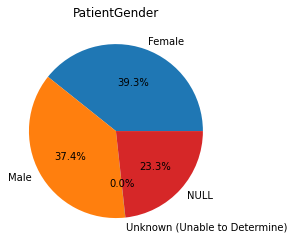

In [8]:
PieChart(df,'PatientId','PatientGender')

### FRD Personnel Gender

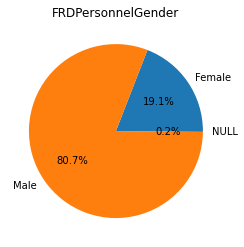

In [9]:
PieChart(df,'FRDPersonnelID','FRDPersonnelGender')

### Shift

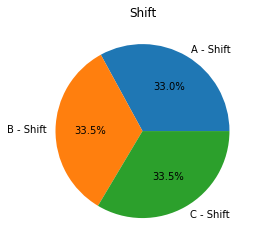

In [10]:
PieChart(df,'PatientId','Shift')

### Battalion

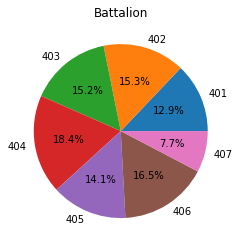

In [11]:
PieChart(df,'PatientId','Battalion')

### Unit ID Prefix

In [12]:
def ExtractPrefix(dsRow):
    return(re.search('\A[a-zA-z]+',dsRow['UnitId']).group(0)) #Extract all letters at start of Unit ID
dfUnitID=ReduceToOneRowPerID(df,'PatientId','UnitId') #Reduce unique Patient IDs
dfUnitPrefix=pd.DataFrame()
dfUnitPrefix['Number of Patient IDs']=dfUnitID.apply(ExtractPrefix,axis=1).value_counts() #Count how many Patient IDs with each Unit ID prefix
dfUnitPrefix['Percent of Patient IDs']=(dfUnitPrefix['Number of Patient IDs']/dfUnitPrefix['Number of Patient IDs'].sum()*100).round(2)
print('Unit ID Prefixes')
dfUnitPrefix

Unit ID Prefixes


,Number of Patient IDs,Percent of Patient IDs
M,236206,95.66
E,4692,1.90
A,3383,1.37
R,1022,0.41
TT,499,0.20
TL,485,0.20
T,378,0.15
EMS,194,0.08
HM,62,0.03
BC,3,0.00


### Dispatch Time

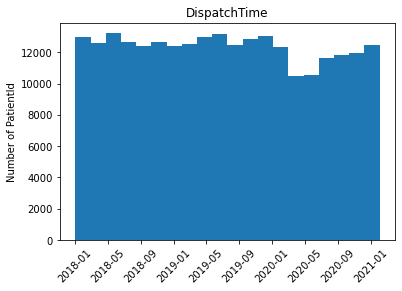

In [13]:
Histogram(df,'PatientId','DispatchTime')

### FRD Personnel Start Date

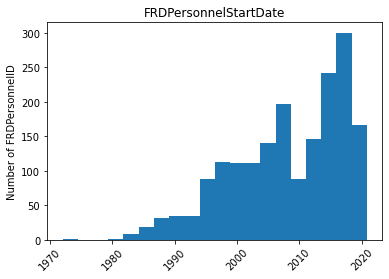

In [14]:
Histogram(df,'FRDPersonnelID','FRDPersonnelStartDate')

## Confirm Assumptions But No Visualizations
These columns don't lend well to visualizations, but we still want to confirm our assumptions that there should be a single value per PatientID. A warning message will be thrown from ReduceToOneRowPerID() if the assumption is violated.

### Unit ID

In [15]:
dontPrint=ReduceToOneRowPerID(df,'PatientId','UnitId')

### Fire Station

In [16]:
dontPrint=ReduceToOneRowPerID(df,'PatientId','FireStation')

### Patient Outcome
Use jdg-descriptive-statistics-top10 to create a Top 10 horizontal bar chart.

In [17]:
dontPrint=ReduceToOneRowPerID(df,'PatientId','PatientOutcome')